**Dataset creating**

In [0]:
# Google Images downloader
!pip install google_images_download

In [0]:
# Generate own dataset with Google Images
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()
data_path = "/content/drive/My Drive/image_classifier/data"
train_path = data_path + "/train"
valid_path = data_path + "/valid"

words = "Wendy Testaburger, Towelie, Token Black, Timmy Burch, Stan Marsh, Sheila Broflovski, Sharon Marsh, Saddam Hussein, Randy Marsh, Mr. Slave, Mr. Mackey, Mr. Hankey, Mr. Garrison, Lucifer, Kyle Broflovski, Kenny McCormick, Jimmy Valmer, Ike Broflovski, Gerald Broflovski, Eric Cartman, Chef, Butters Stotch, Bebe Stevens"
words_array = words.split(', ')
for word in words_array:
    search_request = word
    arguments = {"keywords":'South park ' + search_request,"pk":"south park","limit":60,"print_urls":False,"output_directory":train_path,"image_directory":word,"silent_mode":True}
    paths = response.download(arguments)

In [0]:
# Generate valid folders


**Network**

In [0]:
# Mount drive to Google Collab
from google.colab import drive
drive.mount('/content/drive')

# FastAI
!curl -s https://course.fast.ai/setup/colab | bash

# Definitions
from fastai import *
from fastai.vision import *
import numpy as np

data_path = "/content/drive/My Drive/image_classifier/data"

Training

In [0]:
# Instantiate model for training
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(data_path,ds_tfms=tfms, size=500)
model = cnn_learner(data, models.resnet34, metrics=error_rate)

# Training model
model.fit_one_cycle(15, max_lr=slice(1e-6,1e-2))

In [0]:
# Build graphs about LR values
model.lr_find()
model.recorder.plot()

Save

In [0]:
# Save model
# model.save(data_path + "/saved_model_sm_v2")

# Save model states #2
model.export()

Load

In [0]:
# Load full model
# model.load(data_path + "/saved_model") # old
# model.load(data_path + "/saved_model_sm") # new
# model.load(data_path + "/saved_model_sm_v2") # new #2

# Load trained model states wit empty data object
model = load_learner(data_path)

Output

(Category Butters Stotch, tensor(1), tensor([8.8570e-03, 9.4560e-01, 6.4080e-07, 6.4602e-04, 5.0850e-09, 6.3455e-04,
        9.2280e-05, 4.6830e-07, 1.2772e-05, 2.3798e-10, 3.0188e-10, 1.1320e-06,
        1.6309e-08, 5.0188e-11, 1.8988e-07, 5.2147e-10, 6.7177e-08, 1.9555e-07,
        4.4104e-02, 1.2649e-06, 5.8862e-06, 1.5063e-06, 3.8099e-05]))


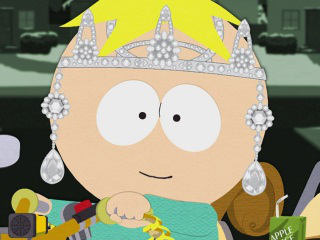

In [30]:
# Output
filename = '/content/drive/My Drive/image_classifier/testing_images/580.jpg'
image = open_image(filename)
pred = model.predict(image)
print(pred)
image